In [69]:
import pandas as pd

In [70]:
data = pd.read_csv('/content/credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#1-EDA

In [71]:
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color': 'black','border-color': '#8b8c8c'})

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,31200,MORTGAGE,3.000000,VENTURE,B,3200,10.990000,0,0.100000,N,2
1,26,200000,MORTGAGE,10.000000,HOMEIMPROVEMENT,B,12000,11.710000,0,0.060000,N,2
2,23,33600,RENT,2.000000,DEBTCONSOLIDATION,C,10750,nan,1,0.320000,Y,3
3,27,33600,MORTGAGE,nan,HOMEIMPROVEMENT,A,6400,7.140000,0,0.190000,N,10
4,31,65000,MORTGAGE,15.000000,VENTURE,B,30000,12.690000,0,0.460000,N,9
5,22,64000,OWN,6.000000,EDUCATION,D,15000,17.490000,0,0.230000,Y,4


- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
- A: The borrower has a high creditworthiness, indicating low risk.
- B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
- C: The borrower's creditworthiness is moderate.
- D: The borrower is considered to have higher risk compared to previous grades.
- E: The borrower's creditworthiness is lower, indicating a higher risk.
- F: The borrower poses a significant credit risk.
- G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
- 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
- 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
- Y: The individual has a history of defaults on their credit file.
- N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

- Person_age: Krediye başvuran bireyin yaşı.
-person_income: Bireyin yıllık geliri.
-person_home_ownership: Bireyin ev sahipliği türü.
- kira: Birey şu anda bir mülk kiralamaktadır.
- ipotek: Bireyin sahip olduğu mülk üzerinde ipotek vardır.
- kendi: Birey, evinin tam sahibidir.
- diğer: Veri kümesine özel olabilecek diğer ev sahipliği kategorileri.
-person_emp_length: Bireyin yıl cinsinden çalışma süresi.
- Credit_intent: Kredi başvurusunun ardındaki amaç.
- kredi_derecesi: Borçlunun kredi itibarına göre krediye atanan not.
- A: Borçlunun kredi itibarı yüksek, bu da düşük riske işaret ediyor.
- B: Borçlu nispeten düşük risklidir ancak A Sınıfı kadar kredi itibarına sahip değildir.
- C: Borçlunun kredi itibarı orta düzeydedir.
- D: Borçlunun önceki notlara göre daha yüksek riske sahip olduğu kabul edilir.
- E: Borçlunun kredi itibarı daha düşük, bu da daha yüksek bir riske işaret ediyor.
- F: Borçlu önemli bir kredi riski taşımaktadır.
- G: Borçlunun kredi itibarı en düşük seviyede olup, en yüksek riski ifade etmektedir.
- Credit_amnt: Kişinin talep ettiği kredi tutarı.
- Credit_int_rate: Krediyle ilişkili faiz oranı.
- Credit_status: Kredi durumu; burada 0, temerrüt dışı olanı ve 1, temerrüdü belirtir.
- 0: Temerrüt dışı - Borçlu, krediyi kararlaştırıldığı gibi başarıyla geri ödedi ve herhangi bir temerrüt olmadı.
- 1: Temerrüt - Borçlu, krediyi üzerinde anlaşılan şartlara göre geri ödeyemedi ve krediyi temerrüde düşürdü.
- kredi_yüzde_gelir: Kredi tutarının temsil ettiği gelir yüzdesi.
- cb_person_default_on_file: Kredi bürosu kayıtlarına göre bireyin geçmiş temerrüdü.
- Y: Kişinin kredi dosyasında temerrüt geçmişi var.
- N: Kişinin herhangi bir temerrüt geçmişi bulunmamaktadır.
- cb_preson_cred_hist_length: Bireyin kredi geçmişinin uzunluğu.

In [72]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [73]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [75]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [76]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [77]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [78]:
data.duplicated().sum()

165

In [79]:
data.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


Text(0.5, 1.0, ' Condusion Matrix')

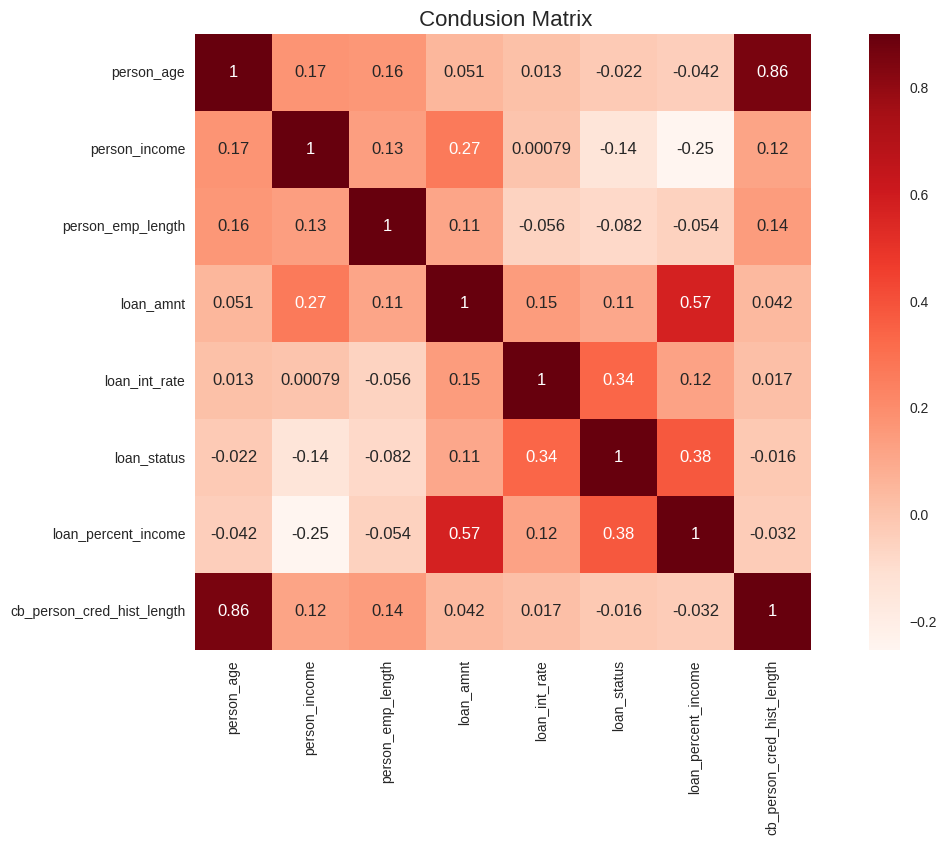

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(numeric_only = True),vmax = 0.9,square = True,annot= True,cmap = 'Reds')
plt.title(' Condusion Matrix',fontsize = 16)

In [81]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#ddefdd;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [82]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

,count
person_age,
23,3889
22,3633
24,3549
25,3037
26,2477
27,2138
28,1854
29,1687
30,1316


UniVarient Analysis

In [83]:
# Person Max and Min Age
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f'Maximum Age {max_}')
print(f'Minimum Age{min_}')

def age_group(arr):
  lenarr = len(arr)

  for i in range(0,lenarr-1):
    next_ = arr[i] +1
    num_people = data['person_age'].between(next_,arr[i+1]).sum()
    print(f"Age between{next_} and {arr[i+1]} : Number of People {num_people}")

age_group([0,18,25,35,45,55,65])

Maximum Age 144
Minimum Age20
Age between1 and 18 : Number of People 0
Age between19 and 25 : Number of People 15352
Age between26 and 35 : Number of People 13763
Age between36 and 45 : Number of People 2814
Age between46 and 55 : Number of People 513
Age between56 and 65 : Number of People 104


In [84]:
max_ = data['person_income'].max()
min_ = data['person_income'].min()
print(f"Person İncome Maximum: {max_}")
print(f"Person Income Minimum: {min_}")

def income_group(arr):
  lenarr = len(arr)
  for i in range(0,len(arr)-1):
    after = arr[i] + 1
    num_income = data['person_income'].between(after,arr[i+1]).sum()
    print(f"Income Between {after} and {arr[i+1]} : number Of People {num_income}")

income_group([0,25000,50000,75000,100000,200000,float('inf')])

Person İncome Maximum: 6000000
Person Income Minimum: 4000
Income Between 1 and 25000 : number Of People 2469
Income Between 25001 and 50000 : number Of People 11613
Income Between 50001 and 75000 : number Of People 9622
Income Between 75001 and 100000 : number Of People 4670
Income Between 100001 and 200000 : number Of People 3760
Income Between 200001 and inf : number Of People 447


In [85]:
max_loan_amount = data["loan_amnt"].max()
min_loan_amount = data["loan_amnt"].min()
print(f"Maximum Load Amount: {max_loan_amount}")
print(f"Minimum Load Amount : {min_loan_amount}")


def loan_nums(arr):
  lenarr = len(arr)
  for i in range(0,lenarr-1):
    after = arr[i] + 1
    num_loan = data['loan_amnt'].between(after,arr[i+1]).sum()
    print(f"Loan Amount {after} and {arr[i+1]} : Number of People {num_loan}")

loan_nums([0,5000,10000,15000,20000,float('inf')])

Maximum Load Amount: 35000
Minimum Load Amount : 500
Loan Amount 1 and 5000 : Number of People 9489
Loan Amount 5001 and 10000 : Number of People 12040
Loan Amount 10001 and 15000 : Number of People 6123
Loan Amount 15001 and 20000 : Number of People 2789
Loan Amount 20001 and inf : Number of People 2140


In [86]:
import plotly.express as px

level_counts = data.person_home_ownership.value_counts()
print(f"Person Home Owner Ship : {level_counts}")

fig = px.pie(
    values = level_counts.values,
    names = level_counts.index,
    title = "Person Home OwnerShip"
)

fig.update_traces(
    textinfo = 'label+percent+value',textfont_size=13,
    marker = dict(line = dict(color = '#102000', width=0.2))
)

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'gray'
fig.show()

Person Home Owner Ship : person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


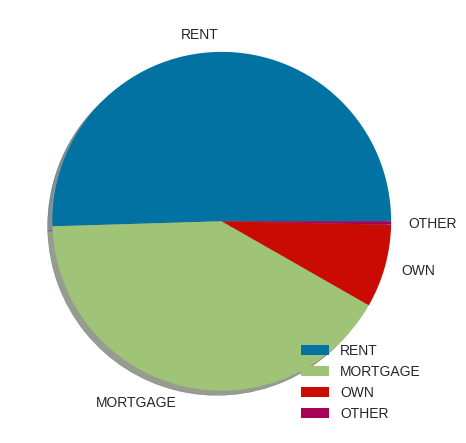

In [87]:
level_counts = data.person_home_ownership.value_counts()

my_values= level_counts.values
my_labels = level_counts.index


plt.pie(my_values,labels=my_labels,shadow=True)
plt.legend()
plt.show()

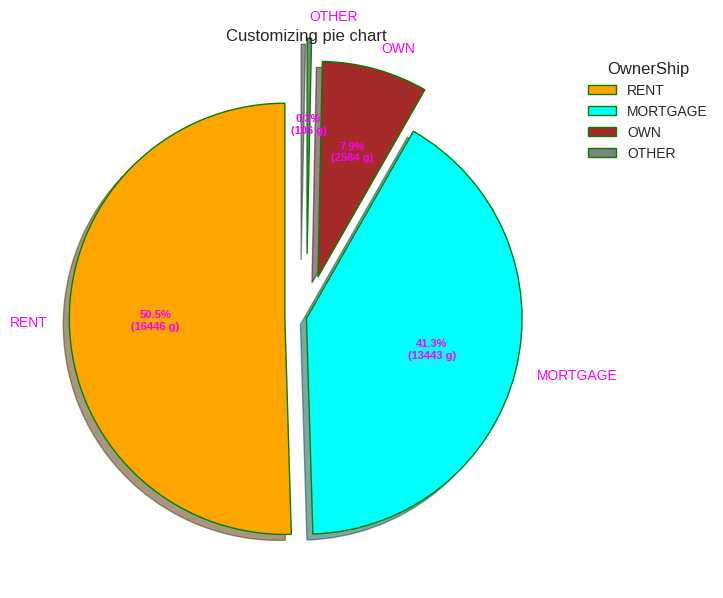

In [88]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)

# Creating color parameters
colors = ("orange", "cyan", "brown",
		"grey")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments


def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} g)".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(level_counts.values,
								autopct=lambda pct: func(pct, level_counts.values),
								explode = explode,
								labels=level_counts.index,
								shadow=True,
								colors = colors,
								startangle=90,
								wedgeprops=wp,
								textprops=dict(color="magenta"))

# Adding legend
ax.legend(wedges, level_counts.index,
		title="OwnerShip",
		loc="upper left",
		bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


In [89]:
level_counts = data.loan_grade.value_counts()
print(f"Loan Grades Info : {level_counts}")

fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

Loan Grades Info : loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


In [90]:
fig = px.histogram(
    data,
    x = 'loan_intent',
    histnorm = 'percent',
    text_auto='.2f',
    template='presentation',
    title = 'Loan Intent',
    color_discrete_sequence=px.colors.sequential.Mint
)
fig.update_layout()
fig.show()

In [91]:
fig = px.histogram(
    data,
    x = 'cb_person_cred_hist_length',
    histnorm = 'percent',
    text_auto='.2f',
    template='presentation',
    title = 'Person Credit History Length',
    color_discrete_sequence=px.colors.sequential.Mint
)
fig.update_layout()
fig.show()

In [92]:
import seaborn as sns

#sns.pairplot(data,hue = 'loan_status')

#2-FEATURE ENGİNEERING

In [93]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [94]:
# drop missing values
data.dropna(axis = 0,inplace = True)

In [95]:
# check the data
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [96]:
#  Looking the target
data['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [97]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [98]:
# Reset index
data.reset_index(inplace = True)

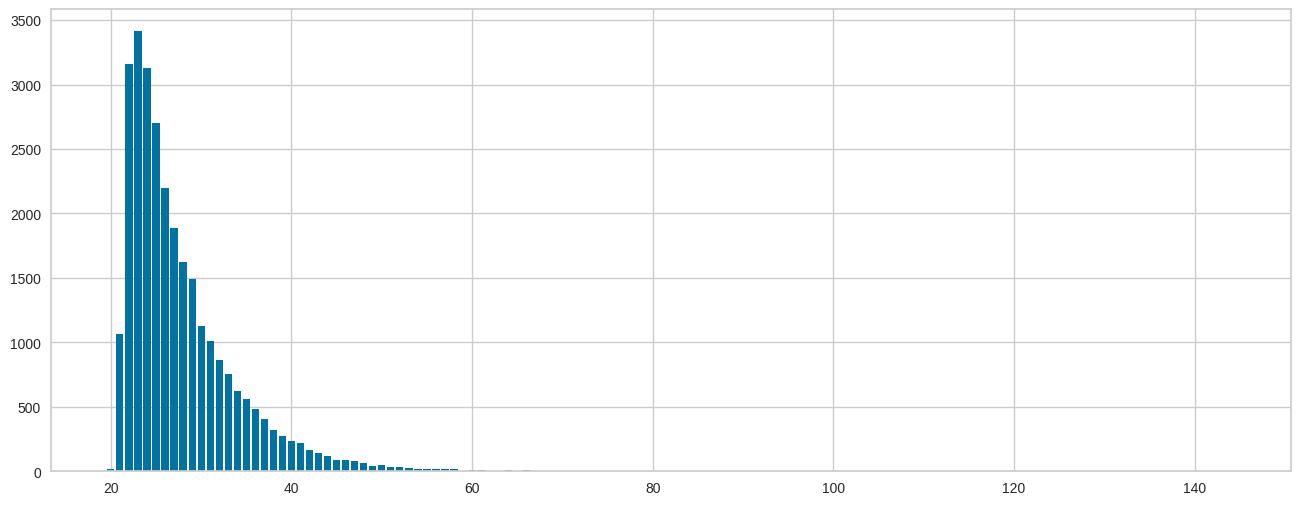

In [99]:
# Look at the age range
import matplotlib.pyplot as plt

values = data['person_age'].value_counts().values
index = data['person_age'].value_counts().index

fig = plt.figure(figsize = (16,6))
plt.bar(index,values)
plt.show()

In [100]:
# We will drop rare age ranges
print((data['person_age'].value_counts().values>80).sum())
data = data.drop(data[data['person_age'] > 80].index, axis=0)


26


In [101]:
data['person_age'].info()

<class 'pandas.core.series.Series'>
Index: 28633 entries, 0 to 28637
Series name: person_age
Non-Null Count  Dtype
--------------  -----
28633 non-null  int64
dtypes: int64(1)
memory usage: 447.4 KB


In [102]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True)

In [103]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


In [104]:
# Income Group
data['income_group'] = pd.cut(
    data['person_income'],
    bins = [0,25000,50000,75000,100000,float('inf')],
    labels = ['low','low-middle','middle','high-middle','high']
)
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [105]:
# Loan Amounts
data['loan_amount_group'] = pd.cut(
    data['loan_amnt'],
    bins = [0,5000,10000,15000,float('inf')],
    labels = ['small','medium','large','very_large']
)
data['loan_amount_group']

0        very_large
1             small
2            medium
3        very_large
4        very_large
            ...    
28633        medium
28634    very_large
28635    very_large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very_large']

In [106]:
#Drop person emp length > 60
data = data.drop(data[data['person_emp_length']>60].index,axis = 0)


In [107]:
data = data.drop(['index'],axis =1)
data.reset_index(inplace = True)
data = data.drop(['index'],axis = 1)

In [108]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very_large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very_large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [109]:
#Create load to income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan to employment length ratio
data['loan_to_emp_length_ratio'] = data['person_emp_length'] / data['loan_amnt']

# Create interest rate to loan amount rate
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']



In [110]:
print(data.columns)
raw_data = data.copy()

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')


In [111]:
col_list = ['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',#
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_columns = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_columns = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_columns = []

In [112]:
data = data.drop(drop_columns,axis =1)

In [113]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

#3-Data PreProcessing

In [114]:
X = data.drop('loan_status',axis = 1)
y = data['loan_status']

In [115]:
# Split train test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [116]:
print(X_train.shape,X_test.shape)

(22904, 17) (5727, 17)


In [117]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace = True)

In [118]:
X_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [119]:
# Do one hot encoding conversion
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train[ohe_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              feature_name_combiner='concat', handle_unknown='error',
              max_categories=None, min_frequency=None, sparse_output=True)

In [120]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very_large'], dtype=object)]

In [121]:
# Merge all ohe categories
import numpy as np
merge_ohe_col = np.concatenate([
    ohe.categories_[0],
    ohe.categories_[1],
    ohe.categories_[2],
    ohe.categories_[3],
    ohe.categories_[4],
    ohe.categories_[5],
    ohe.categories_[6],
])

In [122]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very_large'],
      dtype=object)

In [123]:
# Let's do the transformation

ohe_data = pd.DataFrame(ohe.transform(X_train[ohe_columns]).toarray(),columns = merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(X_test[ohe_columns]).toarray(),columns = merge_ohe_col)

In [124]:
# Concat and clean
X_train_ = pd.concat([ohe_data,X_train],axis = 1)
X_train_ = X_train_.drop(ohe_columns,axis =1)

X_test_ = pd.concat([ohe_data2,X_test],axis = 1)
X_test_ = X_test_.drop(ohe_columns,axis = 1)


In [125]:
X_train_.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23,35000,7.0,5400,10.59,0.15,2,0.154286,0.001296,0.001961
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28,150000,6.0,10000,8.07,0.07,8,0.066667,0.000600,0.000807
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25,110000,1.0,10000,12.69,0.09,3,0.090909,0.000100,0.001269
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,51000,10.0,5000,12.42,0.10,4,0.098039,0.002000,0.002484
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25,50000,9.0,8000,10.00,0.16,2,0.160000,0.001125,0.001250


In [126]:
X_test_.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,30,30000,4.0,6500,15.65,0.22,6,0.216667,0.000615,0.002408
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,50000,9.0,6075,10.00,0.12,2,0.121500,0.001481,0.001646
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,26,65600,5.0,10000,13.55,0.15,2,0.152439,0.000500,0.001355
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,38,50004,2.0,6000,13.79,0.12,11,0.119990,0.000333,0.002298
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35,40000,0.0,5000,6.92,0.13,5,0.125000,0.000000,0.001384


In [127]:
# since there is more than one feature and the numbers differ,let's apply standization
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []

scaler_normal = StandardScaler()
X_train_.loc[:,normal_col] = scaler_normal.fit_transform(X_train_.loc[:,normal_col])
X_test_.loc[:,normal_col] = scaler_normal.transform(X_test_.loc[:,normal_col])

# Alternatives
#scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])


#scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])


In [128]:
X_train_.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.766577,-0.615802,0.548406,-0.670966,-0.146145,-0.186541,-0.942568,0.154286,0.496608,0.046329
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.041557,1.660721,0.301085,0.055280,-0.925935,-0.939280,0.544044,0.066667,-0.155793,-0.566637
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.443323,0.868887,-0.935519,0.055280,0.503680,-0.751096,-0.694800,0.090909,-0.624272,-0.321262
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.281696,-0.299069,1.290368,-0.734118,0.420131,-0.657003,-0.447031,0.098039,1.155948,0.324043
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.443323,-0.318864,1.043047,-0.260479,-0.328715,-0.092449,-0.942568,0.160000,0.336110,-0.331353


#4-Build Classification Models

In [129]:
pip install catboost


In [130]:
pip install bayesian-optimization

In [131]:
# İmporting Libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [132]:
# Create instants
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = lgb.LGBMClassifier()

In [133]:
clf = {
    'KN' : knc,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

#clfs = {
#     'SVC' : svc,
#     'KN' : knc,
#     'NB': mnb,
#     'DT': dtc,
#     'LR': lrc,
#     'RF': rfc,
#     'AdaBoost': abc,
#     'BgC': bc,
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [134]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

def train_classifier(clf,X_train,X_test,y_train,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)


  accuracy = accuracy_score(y_pred,y_test)
  precision = precision_score(y_pred,y_test)
  recall = recall_score(y_pred,y_test)

  # Calculate confusion matrix to get True NEgative and False Positive for specificity
  tn,fp,fn,tp = confusion_matrix(y_pred,y_test).ravel()
  specificity = tn / (tn + fp)

  return accuracy,precision,recall,specificity



In [135]:
# Drop the nan values
X_train_ = X_train_.drop(columns = [col for col in X_train_.columns if pd.isna(col)],axis = 1)
X_test_ = X_test_.drop(columns = [col for col in X_test_.columns if pd.isna(col)],axis = 1)

In [136]:
# USage
accuracy_scores= []
precision_scores = []
recall_scores = []
specificity_scores = []

for name , clf in clf.items():
  current_accuracy,current_precision,current_recall,current_specificity = train_classifier(clf,X_train_,X_test_,y_train,y_test)

  print("For ",name)
  print("Accuracy Score :",current_accuracy)
  print('Precision Score :',current_precision)
  print('Racall Score :' , current_precision)
  print('Specificity Score :' , current_specificity )

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  specificity_scores.append(current_specificity)

For  KN
Accuracy Score : 0.8002444560852104
Precision Score : 0.2686192468619247
Racall Score : 0.2686192468619247
Specificity Score : 0.8298286604361371
For  xgb
Accuracy Score : 0.9441243233804785
Precision Score : 0.7656903765690377
Racall Score : 0.7656903765690377
Specificity Score : 0.9413243922883487
For  cat
Accuracy Score : 0.9455212152959664
Precision Score : 0.7556485355648536
Racall Score : 0.7556485355648536
Specificity Score : 0.9392173189009159
[LightGBM] [Info] Number of positive: 5007, number of negative: 17897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2015
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218608 -> initscore=-1.273796
[LightGBM] [Info] Start training 

In the context of loan default prediction, two key factors come into play: the potential financial impact of missed loan defaults and the risk of denying loans to trustworthy applicants.

1- Recall (Sensitivity): Recall measures how well the model identifies actual loan defaults. For lenders, missing a loan that eventually defaults can lead to significant financial losses. Thus, achieving a high Recall is essential because it ensures that most potential default cases are detected, minimizing the risk of financial setbacks.

2- Specificity: Specificity gauges the model's accuracy in identifying loans that won't default. Misclassifying a reliable borrower as a potential defaulter (false positive) can result in lost business opportunities. By emphasizing high Specificity, the model aims to avoid misclassifications that could deny loans to credible applicants.

3- Precision: Precision is a key metric as it evaluates the accuracy of positive predictions. Lenders need to avoid false positives (incorrectly predicting defaults) to prevent unwarranted actions. Maintaining high Precision ensures that when the model predicts a default, it's highly likely to be accurate. This protects the lender from unnecessary costs and safeguards borrower relationships.

-----------------------------------------------------
Kredi temerrüdü tahmini bağlamında, iki temel faktör devreye giriyor: kaçırılan kredi temerrütlerinin potansiyel finansal etkisi ve güvenilir başvuru sahiplerine kredilerin reddedilmesi riski.

1- Geri Çağırma (Hassasiyet): Geri çağırma, modelin gerçek kredi temerrütlerini ne kadar iyi tanımladığını ölçer. Borç verenler için, sonunda temerrüde düşen bir krediyi kaçırmak, önemli mali kayıplara yol açabilir. Bu nedenle, yüksek bir Geri Çağırma oranına ulaşmak çok önemlidir çünkü bu, çoğu potansiyel temerrüt durumunun tespit edilmesini sağlayarak finansal aksaklık riskini en aza indirir.

2- Özgüllük: Özgüllük, modelin temerrüde düşmeyecek kredileri belirlemedeki doğruluğunu ölçer. Güvenilir bir borçluyu potansiyel temerrüt sahibi olarak yanlış sınıflandırmak (yanlış pozitif), iş fırsatlarının kaybedilmesine neden olabilir. Model, yüksek Özgüllüğü vurgulayarak, güvenilir başvuru sahiplerinin kredi vermesini engelleyebilecek yanlış sınıflandırmalardan kaçınmayı amaçlamaktadır.

3- Kesinlik: Kesinlik, olumlu tahminlerin doğruluğunu değerlendiren önemli bir ölçümdür. Kredi verenlerin, yersiz eylemleri önlemek için yanlış pozitiflerden (temerrütleri yanlış tahmin etmekten) kaçınmaları gerekir. Yüksek Hassasiyetin korunması, model bir varsayılanı tahmin ettiğinde bunun doğru olma ihtimalinin yüksek olmasını sağlar. Bu, borç vereni gereksiz maliyetlerden korur ve borçlu ilişkilerini korur.

#5-Hyperparameters Tuning

In [137]:
#Bayesion Optimization
"""import warnings
warnings.filterwarnings("ignore")
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree

    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_train_, y_train, scoring='recall', cv=10).mean()
    return scores

# Set parameters
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)"""


'import warnings\nwarnings.filterwarnings("ignore")\ndef lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):\n    params_lgbm = {\'objective\': \'binary\'}\n    params_lgbm[\'num_leaves\'] = round((2**round(max_depth))*num_leaves)\n    params_lgbm[\'max_depth\'] = round(max_depth)\n    params_lgbm[\'learning_rate\'] = learning_rate\n    params_lgbm[\'min_child_weight\'] = min_child_weight\n    params_lgbm[\'subsample\'] = subsample\n    params_lgbm[\'colsample_bytree\'] = colsample_bytree\n\n    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),\n                             X_train_, y_train, scoring=\'recall\', cv=10).mean()\n    return scores\n\n# Set parameters\nparams_lgbm ={\n    \'num_leaves\':(0.5,0.9),\n    \'max_depth\': (3, 15),\n    \'learning_rate\': (0.005, 0.3),\n    \'min_child_weight\':(1e-6, 1e-1),\n    \'subsample\':(0.5, 1),\n    \'colsample_bytree\':(0.5, 1)\n}\n\n# Run Bayesian Optimization\nlgbm_

In [138]:
# Best hyperparameters
"""params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm"""

"params_lgbm = lgbm_bo.max['params']\nparams_lgbm['max_depth'] = round(params_lgbm['max_depth'])\nparams_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])\nparams_lgbm"

**A voting classifier** is a machine learning model that gains experience by training on a collection of several models and forecasts an output (class) based on the class with the highest likelihood of becoming the output.

In [139]:
# Use votingclassifier
"""from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_train_, y_train, X_test_, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)"""

'from sklearn.ensemble import VotingClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom xgboost import XGBClassifier\nfrom catboost import CatBoostClassifier\nfrom lightgbm import LGBMClassifier\n\n\nknn = KNeighborsClassifier()\ncat = CatBoostClassifier(verbose=0)\nlgb = LGBMClassifier()\n\n\nensemble = VotingClassifier(estimators=[(\'knn\', knn),  (\'cat\', cat), (\'lgb\', lgb)], voting=\'soft\',verbose=0)\ncurrent_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_train_, y_train, X_test_, y_test)\n\nprint("For ensemble")\nprint("Accuracy - ",current_accuracy)\nprint("Precision - ",current_precision)\nprint("Recall - ",current_recall)\nprint("Specificity - ",current_specificity)'

In [140]:
 # RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


rf_model = RandomForestClassifier()
rf_model.fit(X_train_,y_train)
y_pred = rf_model.predict(X_test_)
tn,fp,fn,tp = confusion_matrix(y_pred,y_test).ravel()
specificity = tn / (tn + fp)

print("Accuracy Score",accuracy_score(y_pred,y_test))
print('Precision Score :' , precision_score(y_pred,y_test))
print('Recall_Score :', recall_score(y_pred,y_test))
print('Specificity :' , specificity)

Accuracy Score 0.9331237995460101
Precision Score : 0.7104602510460251
Recall_Score : 0.9582392776523702
Specificity : 0.9285271638091304


In [ ]:
# Tuning RandomForest
# RandomForest Set Parameters Grid
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap':[True,False]
}

# USe the GridSearch Tuning
grid_search = GridSearchCV(estimator=rf_model,param_grid = param_grid,cv =5,n_jobs =1,verbose =2)
grid_search.fit(X_train_,y_train)

# Fİnd the best parameters
best_params = grid_search.best_params_
print('Best Parameters :',best_params)

In [ ]:
# Find best parameters USe the RandomizerSearchCV

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV  hiperparametre tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_, y_train)

# Fİnd the best parameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

In [ ]:
# Model Training and Evaluate
from sklearn.metrics import classification_report

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_,y_train)

y_pred_best = best_rf.predict(X_test_)

tn,fp,fn,tp = confusion_matrix(y_pred_best,y_test).ravel()
specificity = tn / (tn + fp)

print("Accuracy Score",accuracy_score(y_pred_best,y_test))
print('Precision Score :' , precision_score(y_pred_best,y_test))
print('Recall_Score :', recall_score(y_pred_best,y_test))
print('Specificity :' , specificity)
print('Classification Report :\n', classification_report(y_pred_best,y_test))

- GridSearchCV: Tries all combinations of hyperparameters and chooses the combination that gives the best results. It is more comprehensive but may take longer.
- RandomizedSearchCV: Tries random combinations of hyperparameters over a certain number of iterations. It is faster but less comprehensive.
- param_grid / param_dist: List or distribution of hyperparameter values ​​to try.
- cv: Number of k-cross validation layers (for example, cv=5 uses five-layer k-cross validation).
- n_jobs: Number of threads to run in parallel (-1 uses all processors).
verbose: Controls the amount of information to be displayed on the console during training.
---------------------------------------------------
- GridSearchCV: Hiperparametrelerin tüm kombinasyonlarını dener ve en iyi sonuçları veren kombinasyonu seçer. Daha kapsamlı ancak daha uzun sürebilir.
- RandomizedSearchCV: Hiperparametrelerin rastgele kombinasyonlarını belirli bir iterasyon sayısı boyunca dener. Daha hızlı ancak daha az kapsamlıdır.
- param_grid / param_dist: Denenecek hiperparametre değerlerinin listesi veya dağılımı.
- cv: K-cross validasyon katman sayısı (örneğin, cv=5 beş katmanlı k-cross validasyon kullanır).
- n_jobs: Paralel çalışacak iş parçacığı sayısı (-1, tüm işlemcileri kullanır).
verbose: Eğitim sırasında konsolda gösterilecek bilgi miktarını kontrol eder.

#6- USE PYCARET

In [ ]:
pip install pycaret

In [143]:
from pycaret.classification import *

In [144]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very_large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very_large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [145]:
model = setup(data = raw_data,target = 'loan_status',session_id = 111)

,Description,Value
0,Session id,111
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28631, 18)"
4,Transformed data shape,"(28631, 43)"
5,Transformed train set shape,"(20041, 43)"
6,Transformed test set shape,"(8590, 43)"
7,Numeric features,10
8,Categorical features,7
9,Rows with missing values,0.1%


In [146]:
best =compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9373,0.9451,0.7296,0.9745,0.8343,0.7966,0.8094,12.1190
lightgbm,Light Gradient Boosting Machine,0.9346,0.9429,0.7215,0.9689,0.8269,0.7877,0.8008,4.2740
xgboost,Extreme Gradient Boosting,0.9342,0.9437,0.7367,0.9482,0.8291,0.7892,0.7989,0.9580
rf,Random Forest Classifier,0.9321,0.9269,0.7127,0.9649,0.8197,0.7791,0.7928,3.2250
gbc,Gradient Boosting Classifier,0.9281,0.9267,0.7051,0.9506,0.8095,0.7664,0.7795,4.7420
et,Extra Trees Classifier,0.9234,0.9191,0.7072,0.9206,0.7998,0.7534,0.7635,2.4480
ada,Ada Boost Classifier,0.8872,0.8983,0.6462,0.7954,0.7128,0.6435,0.6491,1.4240
dt,Decision Tree Classifier,0.8833,0.8380,0.7579,0.7194,0.7379,0.6630,0.6635,0.4780
lda,Linear Discriminant Analysis,0.8722,0.8826,0.6123,0.7521,0.6748,0.5964,0.6014,0.5430
ridge,Ridge Classifier,0.8648,0.8765,0.5407,0.7666,0.6338,0.5540,0.5668,0.3110


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [147]:
evaluate_model(best)

In [148]:
pred_holdout =predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9371,0.9462,0.7276,0.9762,0.8337,0.7960,0.8091


In [149]:
# Save pipeline
save_mode = (best,'my_pipeline')

#7-Use The AUTOGLUON

In [153]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.0/428.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.2/148.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [154]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size = 0.2,random_state =42)

print(train.shape,test.shape)

(22904, 18) (5727, 18)


In [155]:
from autogluon.tabular import TabularDataset,TabularPredictor

predictor = TabularPredictor(label = 'loan_status').fit(train_data = train)
predictions = predictor.predict(test)

No path specified. Models will be saved in: "AutogluonModels/ag-20240714_121043"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.94 GB / 12.67 GB (86.3%)
Disk Space Avail:   75.80 GB / 107.72 GB (70.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

In [156]:
predictor.evaluate(test,silent = True)


{'accuracy': 0.9369652523136023,
 'balanced_accuracy': 0.8544994774490651,
 'mcc': 0.8026585204274812,
 'roc_auc': 0.943985678780739,
 'f1': 0.825181598062954,
 'precision': 0.9793103448275862,
 'recall': 0.7129707112970711}

In [157]:
predictor.leaderboard(test,silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.937664,0.932780,accuracy,0.077703,0.030016,3.042991,0.077703,0.030016,3.042991,1,True,11
1,CatBoost,0.937140,0.930162,accuracy,0.021586,0.012291,10.760315,0.021586,0.012291,10.760315,1,True,7
2,LightGBM,0.937140,0.932780,accuracy,0.140996,0.051342,2.181779,0.140996,0.051342,2.181779,1,True,4
3,WeightedEnsemble_L2,0.936965,0.933653,accuracy,0.288080,0.143573,36.652543,0.004200,0.001278,0.241661,2,True,14
4,LightGBMLarge,0.936441,0.931471,accuracy,0.383050,0.127567,5.705280,0.383050,0.127567,5.705280,1,True,13
5,LightGBMXT,0.934346,0.929289,accuracy,0.294300,0.102816,3.262273,0.294300,0.102816,3.262273,1,True,3
6,NeuralNetFastAI,0.929108,0.924487,accuracy,0.142884,0.090953,34.229102,0.142884,0.090953,34.229102,1,True,10
7,RandomForestEntr,0.928235,0.920995,accuracy,0.446333,0.258628,11.923322,0.446333,0.258628,11.923322,1,True,6
8,RandomForestGini,0.927885,0.920122,accuracy,0.483544,0.160823,11.542109,0.483544,0.160823,11.542109,1,True,5
9,ExtraTreesEntr,0.923346,0.914011,accuracy,0.658224,0.182221,4.380152,0.658224,0.182221,4.380152,1,True,9
